Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

In [77]:
#importing major libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn 

In [78]:
import warnings
warnings.filterwarnings('ignore')

Loading The Dataset

In [79]:
df = pd.read_csv("spam.csv" , encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [80]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [82]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , axis='columns' , inplace= True)

In [83]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
df['spam'] = df['v1'].replace({'ham' : 0 , 'spam' : 1})

In [85]:
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [86]:
df.rename(columns= {'v2' : 'sms'} , inplace=True)

In [87]:
df.head()

,v1,sms,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [88]:
df.drop('v1', axis=1 , inplace=True)

In [89]:
df.head()

,sms,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


Cleaning Data

In [90]:
df.duplicated().sum()

403

In [91]:
df.drop_duplicates(inplace = True)

In [92]:
df.isna().sum()

sms     0
spam    0
dtype: int64

In [93]:
df.isnull().sum()

sms     0
spam    0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5169 non-null   object
 1   spam    5169 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [95]:
df.shape

(5169, 2)

In [96]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to C:\Users\karan
[nltk_data]     saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
stopword = set(stopwords.words('english'))

def cleaning(text):

    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation 
    
    
    text = re.sub(r'[#@$]', '', text)    # Remove specific characters
    
    
    tokens = text.split()                 # tokenize 
    
    text = [token for token in tokens]     #convert to list
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [98]:
df["clean_sms"] =  df["sms"].apply(cleaning)

In [99]:
df.head()

,sms,spam,clean_sms
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


In [100]:
df.drop('sms' , axis= 1 , inplace= True)

In [101]:
df.sample(2)

,spam,clean_sms
1037,0,naughty little thought better flirt flirt n fl...
451,0,thanks hope good day today


Data Visualization

In [102]:
sn.set_theme(style='darkgrid')

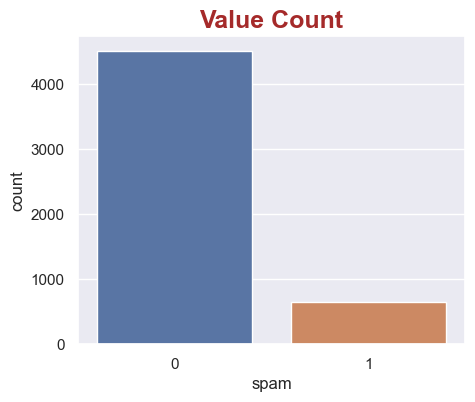

In [103]:
plt.figure(figsize=(5,4))
sn.countplot(data=df , x = 'spam' )
plt.title('Value Count' , fontsize = 18 , fontweight = 'bold' ,color = 'brown')
plt.show()

In [104]:
y = df['spam']
x = df['clean_sms']

In [105]:
x.shape

(5169,)

Embedding words through the tfidf vectorizer

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [107]:
x_transformed = tfidf.fit_transform(x)

In [108]:
x_transformed.shape

(5169, 9403)

Importing various models and training them

In [3]:
from sklearn.linear_model import LogisticRegression 
ls = LogisticRegression()

from sklearn.svm import SVC 
svc = SVC() 

from sklearn.tree import DecisionTreeClassifier 
dc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()

from sklearn.naive_bayes import MultinomialNB 
mn = MultinomialNB()

from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier() 

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

from sklearn.model_selection import cross_val_score 

In [110]:
def score(model):
    scores = cross_val_score(model,x_transformed,y,cv=5)
    avg = np.average(scores)

    return avg

In [111]:
print(score(ls))
print(score(svc))
print(score(dc))
print(score(rf))
print(score(mn))
print(score(kn))
print(score(mlp))


0.940994006302651


0.9626619431113674
0.9537616489502136
0.9667236514180964
0.9551161758675507
0.8980474140594426


So out of the six models we can see that Random forest classifier outperforms as the best model

In [ ]:
#Grid Search Cv for hyper parameter tuning of random forest classifier model
from sklearn.model_selection import GridSearchCV 

clf = GridSearchCV(rf,{
    'n_estimators' : [2,5,10,20,50],
    'criterion' : ["gini", "entropy", "log_loss"]},cv=2,return_train_score=False)
clf.fit(x_transformed,y)
pd.DataFrame(clf.cv_results_)[['param_n_estimators','param_criterion','mean_test_score']]



In [ ]:

clf_2 = GridSearchCV(SVC(gamma = 'auto'), {
    'C' : [1,10,20],
    'kernel' : ['rbf' , 'linear' ,'poly','sigmoid']},
    cv=2,return_train_score=False)

clf_2.fit(x_transformed,y)
clf_2.best_score_


In [112]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_transformed,y,test_size=0.2,random_state=42)

rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9671179883945842

In [113]:
y_predicted = rf.predict(X_test)
rf.predict_proba(X_test)


array([[0.98, 0.02],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

Printing classification report and confusion matrix throug heatmap


In [114]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print (classification_report(y_test,y_predicted))
print (accuracy_score(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.92      1034
weighted avg       0.97      0.97      0.97      1034

0.9671179883945842


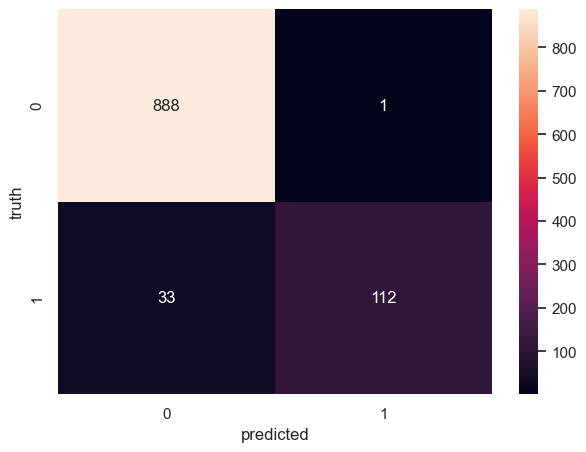

In [115]:
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [140]:
from sklearn.model_selection import RandomizedSearchCV
clf_2 = RandomizedSearchCV(SVC(gamma = 'auto'), {
    'C' : [1,10,20],
    'kernel' : ['rbf' , 'linear' ,'poly','sigmoid']},
    cv=2,return_train_score=False,n_iter=2)

clf_2.fit(x_transformed,y)
clf_2.best_score_


0.873669988202957